In [0]:
import scipy.io.wavfile
import scipy.fftpack
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hann

# Bibliotecas para funcionamento do audio animado no pyaudio
# Não serão carregadas pois não funciona no Colab
#import os, wave
#import pyaudio / pyaudio não funciona no colab
#import gr
#import gr3

In [3]:
from google.colab import files
files.upload()

Saving nomes_1ch.wav to nomes_1ch.wav


{'nomes_1ch.wav': b'RIFFZ\x19\x14\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data6\x19\x14\x00\xd8\xff\xdd\xff\xdd\xff\xe0\xff\xe8\xff\xe2\xff\xeb\xff\xe6\xff\xe8\xff\xe6\xff\xf2\xff\xf4\xff\xfb\xff\xef\xff\xf3\xff\xf3\xff\xfa\xff\xf5\xff\xf5\xff\xf5\xff\xf6\xff\xf5\xff\xf9\xff\xf5\xff\xfb\xff\xfc\xff\xf8\xff\xf6\xff\xf8\xff\t\x00\x0b\x00\x03\x00\x02\x00\x05\x00\xfa\xff\x06\x00\x01\x00\x01\x00\n\x00\xfe\xff\x01\x00\r\x00\x12\x00\x1d\x00\x11\x00\t\x00\x0b\x00\x05\x00\x13\x00\t\x00\x14\x00\x00\x00\x10\x00\x0e\x00\x10\x00\x13\x00\x10\x00\x0f\x00\x16\x00\n\x00\x15\x00\x0f\x00\x18\x00\x1f\x00\x1a\x00\x1b\x00\x17\x00\x13\x00+\x00\x1a\x00\x15\x00\x1c\x00\x19\x00\x1b\x00\x12\x00 \x00\x10\x00\x1f\x00\x18\x00\x1c\x00\x1a\x00\x17\x00\x18\x00\x10\x00\x1d\x00!\x00\x17\x00\x0f\x00\x0f\x00\x10\x00\x0f\x00\x15\x00\x0c\x00\x0f\x00\x12\x00\x14\x00\x0c\x00\x04\x00\x0c\x00\x0c\x00\x0f\x00\x0c\x00\x14\x00\n\x00\r\x00\x16\x00\x0e\x00\x1b\x00\x0f\x00\x11\x00\x0f\x00\

A saída da função wavfile.read é a taxa de amostragem do áudio gravado e os dados deste áudio. A taxa de amostragem representa
o número de dados amostrados por segundo, neste caso, 44100 pedaços de informações por segundo. Quanto maior a taxa de amostragem, melhor a qualidade do áudio.

In [5]:
fs_rate, signal = scipy.io.wavfile.read('./nomes_1ch.wav')
print('Taxa de Amostragem:', fs_rate)
print('Comprimento do Sinal:', len(signal))

Taxa de Amostragem: 44100
Comprimento do Sinal: 658587


In [8]:
import IPython
IPython.display.Audio('./nomes_1ch.wav')

Podemos obter a duração do áudio dividindo o comprimento áudio, dado pela variável **signal** ,pela taxa de amostragem, **fs_rate**:

In [13]:
duration = len(signal)/fs_rate
print(fs_rate)
print('Duração (s): {0:.2f}'.format(duration))

44100
Duração (s): 14.93


Podemos obter a quantidade de canais do áudio através da função **signal.shape**. Note que o tamanho deste sinal é de 1,
pois nosso áudio tem apenas um canal (mono).

In [9]:
len(signal.shape)

1

Utilizando o método 'dtype', podemos verificar que os dados estão guardados como **int16**, indicando um áudio do tipo **16-bit PCM**. O Bit rate representa o fluxo de transferência de bits, que é o número de bits convertidos ou processados por unidade de tempo e está relacionado à fidelidade do audio. Quanto maior a taxa de bits, mais fiel ao sinal real ele é.

In [10]:
signal.dtype

dtype('int16')

Os valores da variável **signal** representam a amplitude do sinal (ou a 'altura' do áudio). 
Podemos representar a amplitude do áudio por tempo como representado nas nas funções a seguir:

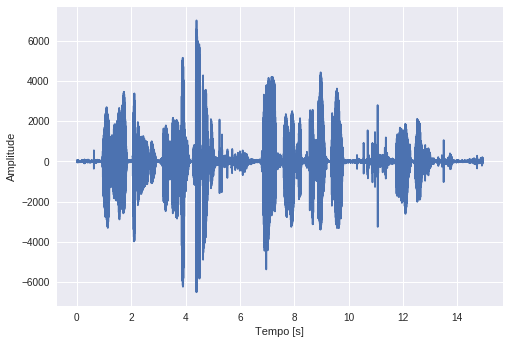

In [25]:
# Eixo de tempo é definido em um espaço de tempo que vai de 0 até a duração total (14,93)
# O intervalo de tempo é definido pelo comprimento do sinal
t = np.linspace(0, duration, len(signal))
s = signal

plt.ylabel("Amplitude")
plt.xlabel("Tempo [s]")
plt.plot(t, s)
plt.show()

Dado um vetor-matriz $ X⃗ =M⋅x⃗  $ com $M$ definido por $Mkn=e−i 2π k n / N$, podemos expressar a DFT com a seguinte função:






In [0]:
def DFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

Como iremos utilizar a função já implementada pelas bibliotecas Numpy e Scipy, vamos comparar o resultado da transformada com a função implementada manualmente acima, para comprovar que estamos realizando a mesma operação:

In [18]:
# Sinal randômico de 0 a 2046
x = np.random.random(2046)

# Comparando os resultados
np.allclose(DFT(x), np.fft.fft(x))

True

O resultado da transformada são os coeficientes de frequência e amplitude, expressados por um vetor de números complexos:

In [19]:
print(np.fft.fft(x))

[1023.50452461 +0.j           -4.48607939+11.66713098j
    2.07889788+10.610942j   ...    7.92642437 +4.93203368j
    2.07889788-10.610942j     -4.48607939-11.66713098j]


**Window** é uma função de janela aplicada a cada parte do sinal antes da conversão de frequência. Se você não usar uma função de janela, haveria mudanças bruscas no início e no final de cada chunk, o que produz componentes de frequência ampla que você não deseja. A função de janela é como um envelope de "fade-in, fade-out" do sinal.

In [0]:
N = signal.size
w = hann(N)

Podemos mostrar os valores de amplitude de cada freqência do sinal, utilizando a função specgram da biblioteca matplotlib. Entretando, é necessário definir os valores da transformada (NTFT), Frequencia de Amostragem (fs_rate), Função Janela (Hanning) e valores de Sobreposição:

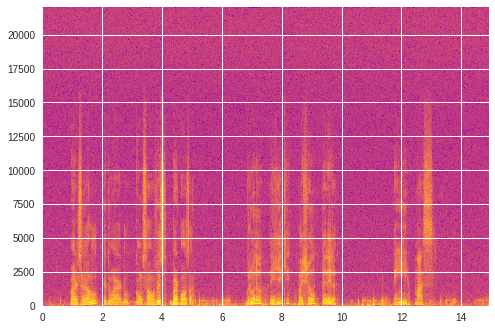

In [15]:
Pxx, freqs, bins, im = plt.specgram(signal, NFFT=1024, Fs=fs_rate, Fc=0, detrend=plt.mlab.detrend_none,
         window=plt.mlab.window_hanning, noverlap=128,
         cmap='plasma', xextent=None, pad_to=None, sides='default',
         scale_by_freq=None, mode='default', scale='default')

Aplicando a FFT nos pedaços definidos de audio (chunks), podemos plotar um gráfico de freências por tempo e suas amplitudes, aplicando todos os conceitos verificados anteriormente:

In [0]:
FS= fs_rate
# Amostras que serão coletadas para plotagem
SAMPLES = 3072

# Abre o arquivo com Pyaudio
wf = wave.open(os.path.join(os.path.dirname(os.path.realpath(__file__)),
                            'D:\\nomes_1ch.wav'), 'rb')
pa = pyaudio.PyAudio()
stream = pa.open(format=pa.get_format_from_width(wf.getsampwidth()),
                 channels=wf.getnchannels(), rate=wf.getframerate(), output=True)

# Preenche o array de espectros com zeros em um intervalo predefinido
spectrum = np.zeros((256, 64), dtype=float)
# Ajuste de tempo para plotagem
t = -73
# Duração do audio
dt = float(SAMPLES) / FS
# Frequencia do audio
df = FS / float(SAMPLES) / 2 / 2

# Enquanto lê as amostras:
data = wf.readframes(SAMPLES)
while data != '' and len(data) == SAMPLES * wf.getsampwidth():
    stream.write(data)
    # Constroi o array de amplitude
    amplitudes = np.fromstring(data, dtype=np.short)
    # Calcula as amplitudes pelos valores da transformada
    # Considerando apenas metade da amostra
    power = abs(np.fft.fft(amplitudes / len(data)))[:SAMPLES//2]

    gr.clearws()
    # Monta o array de espectro de frequencia
    spectrum[:, 63] = power[:256]
    spectrum = np.roll(spectrum, 1)
    #Trabalha com posicionamento da plotagem
    gr.setcolormap(-113)
    gr.setviewport(0.05, 0.95, 0.1, 10)
    gr.setwindow(t * dt, (t + 63) * dt, 0, 1.5)
    gr.setspace(0, 256, 45, 80)
    # Plota os eixos X, Y e Z
    gr3.surface((t + np.arange(64)) * dt, np.linspace(0, df, 256), spectrum, 4)
    gr.setscale(0)
    gr.titles3d('Tempo (s)', 'Frequencia [kHz]/10.000', 'Amplitude')
    gr.updatews()

    data = wf.readframes(SAMPLES)
    t += 1